In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/ADMIN/Desktop/Data Science Assign/SLR/Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.shape

(30, 2)

In [6]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data[data.duplicated()].shape

(0, 2)

In [9]:
#therefore we can see that there are no duplicate rows 
data[data.duplicated()]

,YearsExperience,Salary


In [10]:
data.isnull().sum()
#there are no null values

YearsExperience    0
Salary             0
dtype: int64

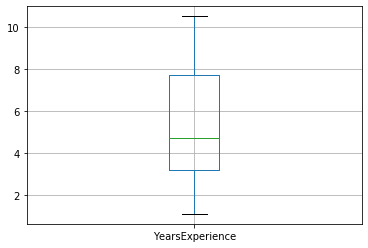

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column=['YearsExperience'])

<AxesSubplot:>

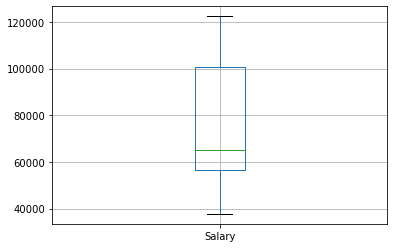

In [14]:
data.boxplot(column=['Salary'])

In [12]:
#there are no outliers

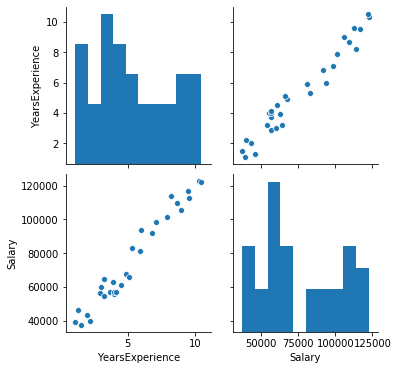

In [13]:
import seaborn as sns
sns.pairplot(data)

In [14]:
#normalization
#converting to z-score
def z_conv(x):
    temp=(x-x.mean())/x.std()
    return temp


df_norm=z_conv(data.iloc[:,0:2])

In [15]:
df_norm

,YearsExperience,Salary
0,-1.484672,-1.337252
1,-1.414197,-1.086946
2,-1.343722,-1.396053
3,-1.167535,-1.184705
4,-1.097060,-1.317262
5,-0.850398,-0.706234
6,-0.815160,-0.578272
7,-0.744685,-0.786374
8,-0.744685,-0.421603
9,-0.568498,-0.686281


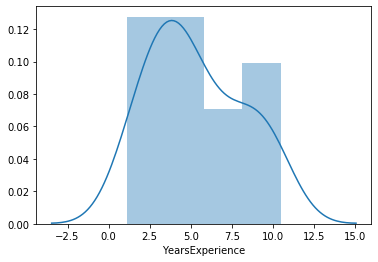

In [16]:
sns.distplot(data['YearsExperience'])

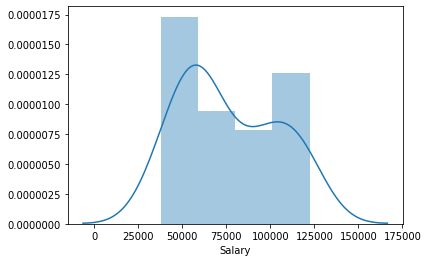

In [17]:
sns.distplot(data['Salary'])

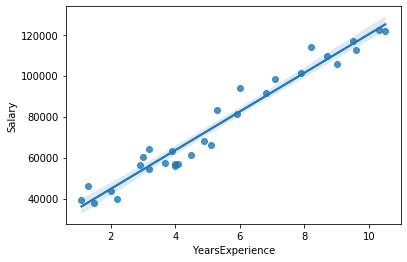

In [18]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        12:37:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#t-values and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)